In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import logging as log
# import matplotlib.pyplot as plt
import os,sys

sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.eda import EDA
from scripts import plots 
from scripts import util


# Reading Dataset from CSV to DataFrame

In [44]:
#Reading the train dataset

train_data = pd.read_csv('../data/train.csv')
train_data.head()

C:\Users\ProgrammingOperative\AppData\Local\Temp\ipykernel_7188\3999870250.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../data/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [45]:
train_data.shape

(1017209, 9)

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [47]:
# Reading the test data

test_data = pd.read_csv('../data/test.csv')
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [48]:
test_data.shape

(41088, 8)

In [49]:
store_data = pd.read_csv('../data/store.csv')
store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [50]:
#Merging the Data
train_store = pd.merge(train_data, store_data, how = 'left', on = "Store")
test_store = pd.merge(test_data, store_data, how = 'left', on = "Store")

In [51]:
train_store.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [52]:
## Adding 

In [53]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [54]:
#Converting timestamp dtype into datetime using pd.to_datetime This is Necessary, so we can aggregate data into defined time period example month/day etc..
train_store['Date'] = pd.to_datetime(train_store['Date'])
test_store.info(), test_store.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

(None,
    Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday  \
 0   1      1          4  2015-09-17   1.0      1            0              0   
 1   2      3          4  2015-09-17   1.0      1            0              0   
 2   3      7          4  2015-09-17   1.0      1            0              0   
 3   4      8          4  2015-09-17   1.0      1            0              0   
 4   5      9          4  2015-09-17   1.0      1            0              0   
 
   StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
 0         c          a               1270.0                        9.0   
 1         a          a              14130.0                       12.0   
 2         a          c              24000.0                        4.0   
 3         a          a               7520.0                       10.0   
 4         a          c               2030.0                        8.0   
 
    CompetitionOpenSinceYear  Promo2  Promo2SinceWeek

In [55]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [56]:
#Add day and month columns
train_store = util.add_month_year(train_store)
train_store.head()

D:\10 Academy\Week 3\Pharmaceutical-Sales-Prediction\scripts\util.py:43: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  new_df['WeekOfYear'] = df['Date'].dt.weekofyear


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


In [57]:
train_store = train_store.set_index('Date', inplace=False)
train_store.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,c,a,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
2015-07-31,2,5,6064,625,1,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2015-07-31,3,5,8314,821,1,1,0,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2015-07-31,4,5,13995,1498,1,1,0,1,c,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
2015-07-31,5,5,4822,559,1,1,0,1,a,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


In [58]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 1

In [59]:
#Getting % of missing values in train data
print(f"Null Percentage of Train and Score : {util.get_null_percentage(train_store)} %")


Null Percentage of Train and Score : 10.17 %


In [60]:
#Converting date into datetime object for test data
test_store['Date'] = pd.to_datetime(test_store['Date'])
test_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [61]:
test_store = util.add_month_year(test_store)
test_store.head()

D:\10 Academy\Week 3\Pharmaceutical-Sales-Prediction\scripts\util.py:43: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  new_df['WeekOfYear'] = df['Date'].dt.weekofyear


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17,38
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17,38
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17,38
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17,38


In [62]:
test_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

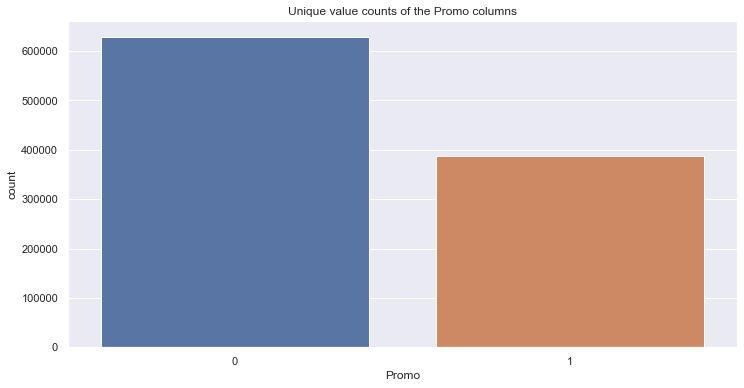

In [63]:
eda_train = EDA(train_store)
eda_train.plot_counts('Promo', type="univariate")

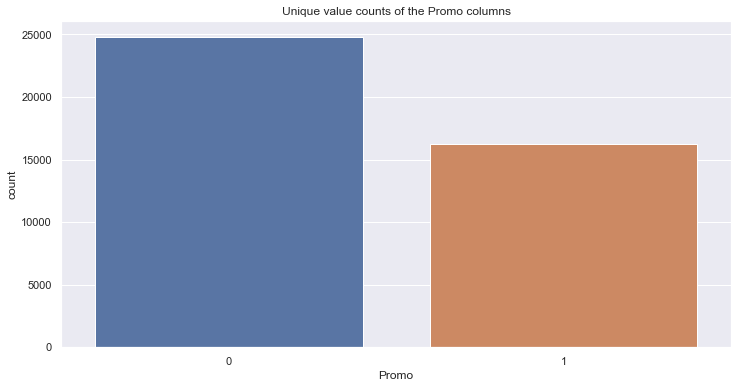

In [64]:
eda_test = EDA(test_store)
eda_test.plot_counts('Promo', type="univariate")

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'WeekOfYear'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

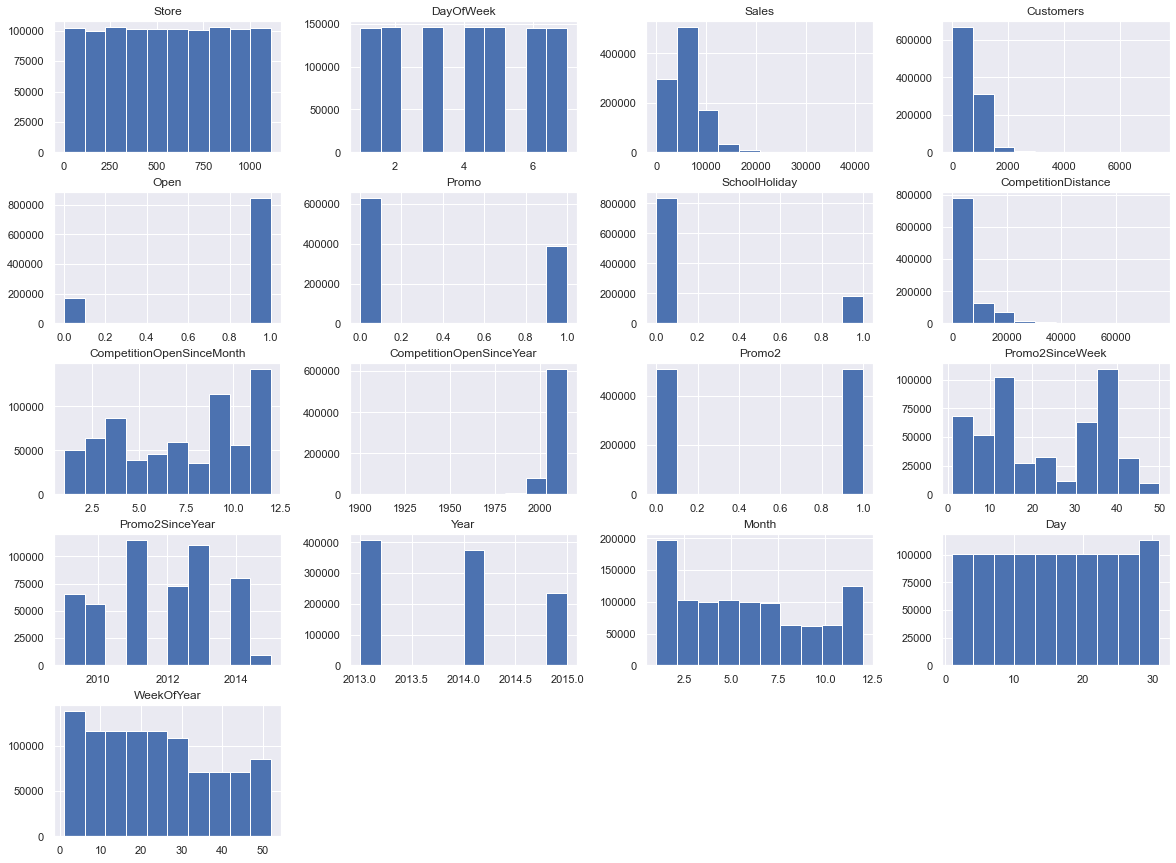

In [65]:
num_feats = list(train_store.select_dtypes(include=['int64', 'float64', 'int32']).columns)
train_store[num_feats].hist(figsize=(20,15))

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Open'}>],
       [<AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>,
        <AxesSubplot:title={'center':'Promo2SinceYear'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'WeekOfYear'}>]], dtype=object)

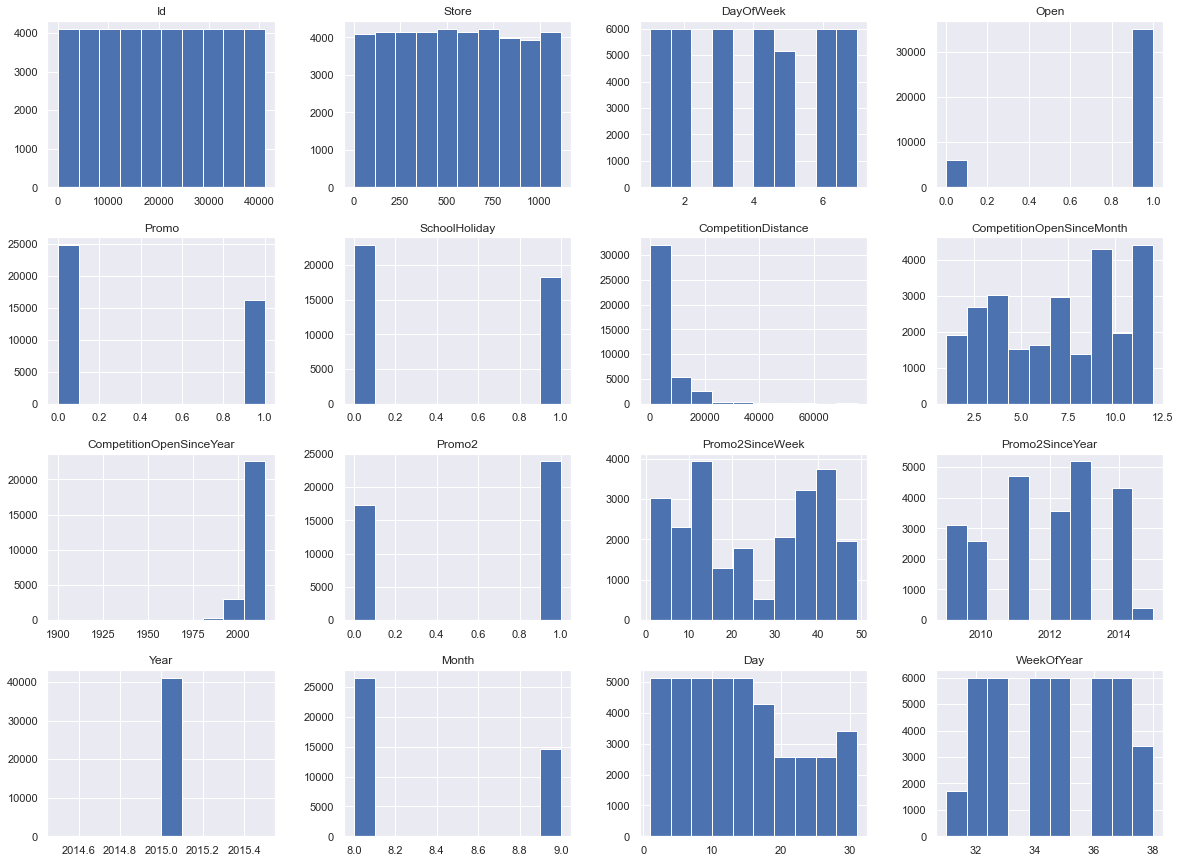

In [66]:
num_feats = list(test_store.select_dtypes(include=['int64', 'float64', 'int32']).columns)
test_store[num_feats].hist(figsize=(20,15))

##### From the plots above, its clear that features are distributed equally between the train and test data for most of the features. We however don't get to see the distribution of sales in the test data and therefore cannot be used for prediction, rather for clustering the stores

In [67]:
open_store = train_store[train_store['Open']==1]
open_store.head(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,c,a,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
2015-07-31,2,5,6064,625,1,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2015-07-31,3,5,8314,821,1,1,0,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31


In [68]:
open_store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844392 entries, 2015-07-31 to 2013-01-01
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Sales                      844392 non-null  int64  
 3   Customers                  844392 non-null  int64  
 4   Open                       844392 non-null  int64  
 5   Promo                      844392 non-null  int64  
 6   StateHoliday               844392 non-null  object 
 7   SchoolHoliday              844392 non-null  int64  
 8   StoreType                  844392 non-null  object 
 9   Assortment                 844392 non-null  object 
 10  CompetitionDistance        842206 non-null  float64
 11  CompetitionOpenSinceMonth  575773 non-null  float64
 12  CompetitionOpenSinceYear   575773 non-null  float64
 13  Promo2       

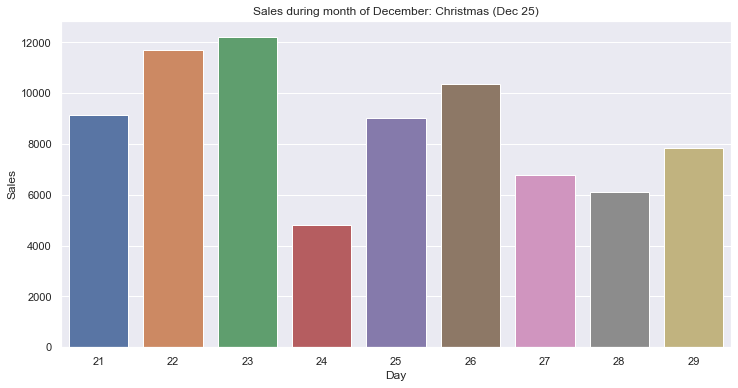

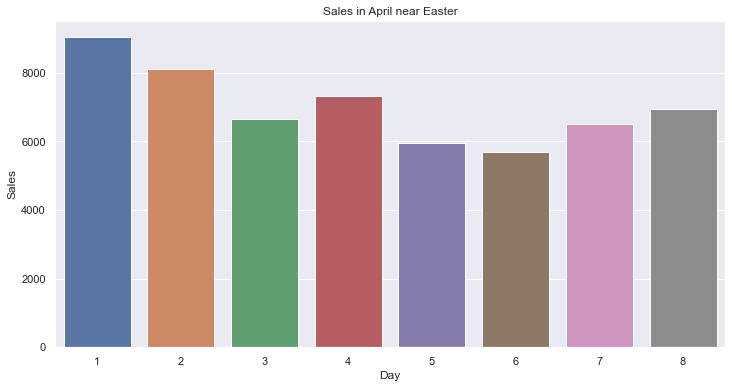

In [69]:

christmas_month = 12
easter_month = 4


christmas_month = open_store[open_store.Month == christmas_month]
easter_month = open_store[open_store.Month == easter_month]
christmas_month

around_christmas = christmas_month[(christmas_month['Day'] > 20) & (christmas_month['Day'] < 30)]
around_christmas = around_christmas[['Day', 'Sales']].groupby('Day').mean()

around_easter = easter_month[(easter_month['Day'] > 0) & (easter_month['Day'] < 9)]
around_easter = around_easter[['Day', 'Sales']].groupby('Day').mean()

# around_christmas.plot.bar(around_christmas.index, around_christmas['Sales'], rot=0)
plots.bar(around_christmas.index, around_christmas['Sales'], 'Sales during month of December: Christmas (Dec 25)')
plots.bar(around_easter.index, around_easter['Sales'], 'Sales in April near Easter')

#### Christmas is during the 25th and Easter for 2015 was on the 5th.
In both festival months, sales increased days before christmas and Easter.
During the actual day, sales dropped
After the festivals, sales relatively increased but not as much as those before the actual day

In [70]:
# # plt.figure(figsize=(12, 8))
# plt.scatter(around_christmas["Date"],around_christmas["sales"])
# plt.plot()

#### Find out any seasonality (Christmas, Easter etc) purchase behaviours,

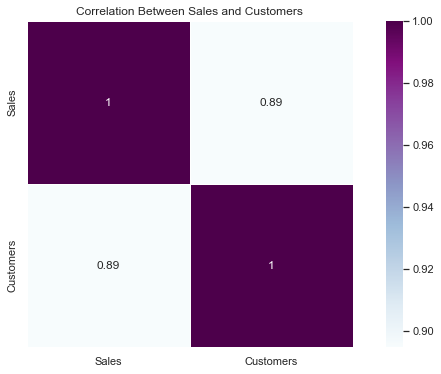

In [71]:
plty = plots.heatmap(train_store[['Sales', 'Customers']], title='Correlation Between Sales and Customers')
plty

#### Sales and number of customers are highly correlated: Sales increase with increase in number of customers


In [ ]:
sns.set()
plt.hist(train_store[train_store['Promo'] == 1].Sales, color='green', alpha=0.3, label = 'YES')
plt.hist(train_store[train_store['Promo'] == 0].Sales, color='red', alpha=0.3, label = 'NO')
plt.legend()
plt.plot()

In [ ]:
plt.figure(figsize=(12,7))
sns.catplot(data = train_store, x ="Month", y = "Sales",
               hue = 'Promo',
              sharex=False),


In [ ]:
plt.figure(figsize=(12,7))
sns.factorplot(data = train_store, x ="Month", y = "Customers",
               hue = 'Promo',
              sharex=False)


#### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?
#### Store Using promos have significantly high sales. This maybe be linked to the correcsponding increase in the number of attracted customers as well.

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(train_store["DayOfWeek"],train_store["Sales"])
plt.plot()

#### There is an increase in sales at the start of the week and as we approach the weekend

In [ ]:
train_store.info()

In [ ]:

store_with_promo = train_store[train_store.Promo == 1]
result = store_with_promo[['StoreType','Sales', 'Customers']].groupby(['StoreType']).agg({"Sales":"mean"})
result.plot.bar()


In [ ]:
store_with_promo = train_store[train_store.Promo == 1]
result = train_store[['StoreType','Sales', 'Customers']].groupby(['StoreType']).agg({"Sales":"mean"})
result.plot.bar()



#### Promos should be increased in StoreType a since it looks like there is a significant increase in the amount of sales upon promoting

### Trends of customer behavior during store open and closing times

In [ ]:
sns.countplot( x='DayOfWeek', data=train_store, hue="Open", palette="Set1");



In [ ]:
# plt.figure(figsize=(12, 8))
# plt.scatter(train_store["DayOfWeek"],train_store["Sales"])
# plt.plot()

#### Which stores are opened on all weekdays? How does that affect their sales on weekends? 
Very few stores are open during the weekends yet they produce significant sales. This may be due to customers flooding into those stores 

In [ ]:
# (train_store[train_store['Assortment'] == 'a'].Sales).plot.bar(color = 'red')
# (train_store[train_store['Assortment'] == 'a'].Sales).plot.bar(color = 'blue')
# (train_store[train_store['Assortment'] == 'a'].Sales).plot.bar(color = 'yellow')


#### Check how the assortment type affects sales

In [ ]:
# attributes = ["Sales", "CompetitionDistance"]
# scatter_matrix(train_df[attributes], alpha=0.1);

#### How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

In [ ]:
# attributes = ["Sales", "CompetitionOpenSinceMonth"]
# scatter_matrix(train_df[attributes], alpha=0.1);

#### How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance